In [1]:
from IPython.display import Image
import numpy as np

# 1. End-to-End

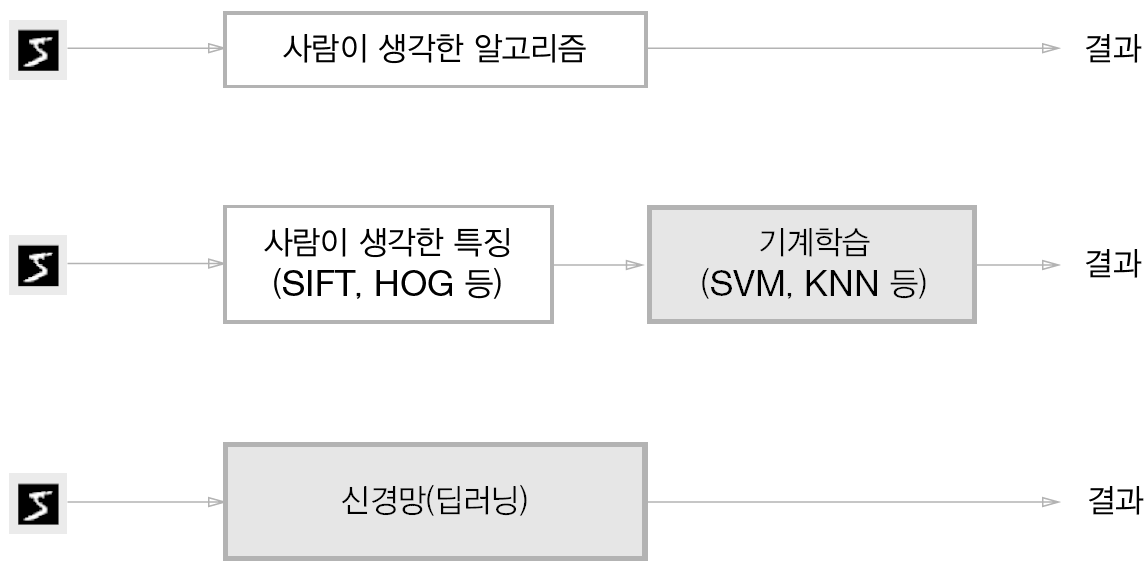

In [2]:
Image("1.png")

In [3]:
# 이미지를 벡터로 변환할 때 사용하는 특징을 인간이 설계하는 경우 (SIFT, HOG) 
# 반면 신경망은 이미지를 있는 그대로 학습한다.
# end- to -end 종단간 학습이란 데이터의 입력에서 출력까지 사람의 개입 없이 모델이 스스로 출력값을 얻어낸다는 뜻이다.
# 데이터의 패턴을 기계가 스스로 찾아내므로 신경망을 사용하면 이미지 문제의 경우  아무 이미지나  다 분류하고 추론해낼 수 있게 된다. 개든 사람얼굴이든

#  2. 손실함수

### 손실함수 : 신경망 성능의 나쁜 정도를 나타내는 지표

1. 오차제곱합 : 모델의 예측값과 정답 레이블의 차의 제곱을 다 더한 것.

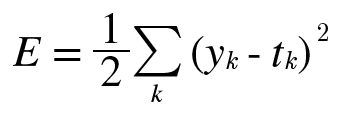

In [4]:
Image("2.png")

In [5]:
# k는 데이터의 차원수. 손글씨면 0부터 9까지  

2. 크로스 엔트로피 : 모델의 예측값에 음의 자연로그를 씌운 것

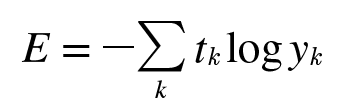

In [6]:
Image("3.png")

In [7]:
# t는 정답레이블, 실질적으로 레이블을 원핫인코딩하므로 tk 값은 1이 되어 크로스엔트로피는 정답레이블만 계산된다.

In [8]:
# 모델의 출력값이 1에 가까울수록 로스는 0이 된다. 
# 모델의 출력값이 0에 가까워지면 로스는 양의 무한대가 된다. 

In [9]:
# 로스를 양수로 표현하기 위해 마이너스를 붙였다.  다시 말해 원래 자연로그 그래프는 아래 그래프를 x축 대칭한 모양이다.

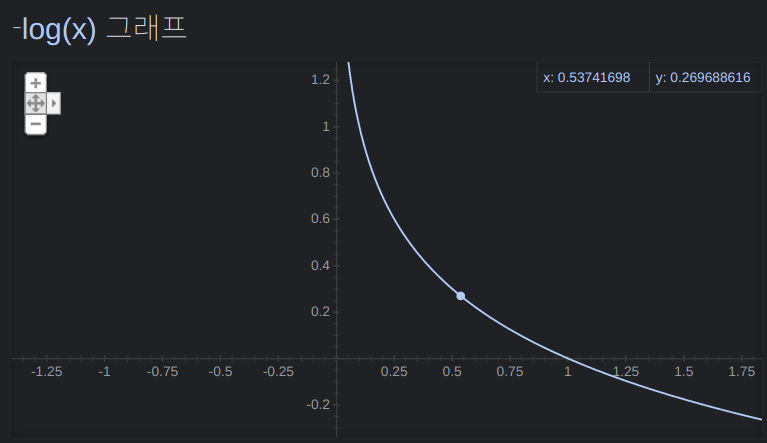

In [10]:
Image("4.png")

In [11]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]                            # 레이블  원핫인코딩
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]      # 모델의 예측값

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [12]:
cross_entropy_error(0.6, 1)

0.510825457099338

# 3. 손실함수 배치처리

In [13]:
# 위에서는 데이터 하나에 대한 로스를 구했다.
# 머신러닝에서 손실함수는 모든 훈련 데이터에 대해 구해야 한다. 
# 그래서 각 로스의 총합이 최저가 되도록 하는 줄여주는 매개변수를 찾아야 한다. 

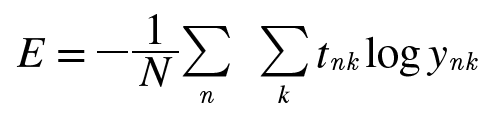

In [14]:
Image("5.png")

In [15]:
# 데이터의 개수가 N(배치사이즈)개일 때, 각 N번째 데이터의 정답 클래스의 음의 로그우도를 구한 뒤 
# 다 더한 다음 N으로 나눠주면 끝이다. N으로 나눠주는 건 정규화시켜주는 것. 즉 평균 손실함수를 구하는 것이다. 
# 이렇게 평균을 쓰면 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있다
# 다시 말해 미니 배치의 크기에 관계 없이 항상 일관된 척도를 얻을 수 있다. 
# 즉 훈련 데이터가 1000개든 10000개든 평균 손실함수를 구할 수 있게 된다. 

그런데 훈련 데이터가 수만, 수십만, 수백만 개일 경우   
모든 데이터의 손실함수를 구하려면 시간이 걸린다.   
그래서 데이터 일부의 로스만 구해 전체의 근사치 로스를 사용할 수 있다.
# 이 일부를 미니배치 라고 한다

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)  
print(t_train.shape) 

(60000, 784)
(60000, 10)


In [2]:
train_size = x_train.shape[0]  # 60000
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)  # np.random.choice()는 지정한 범위의 수 중에서 무작위로 원하는 개수를 꺼낸다 
print("batch_mask : ", batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print("60000장 중 훈련데이터로 랜덤으로 뽑은 데이터의 개수 :", len(x_batch))
print("뽑은 훈련데이터 중 첫번째 데이터의 사이즈 : ", len(x_batch[0]))

batch_mask :  [43383 45428 38933 44852 32252 10298 51611 15438 39956 47762]
60000장 중 훈련데이터로 랜덤으로 뽑은 데이터의 개수 : 10
뽑은 훈련데이터 중 첫번째 데이터의 사이즈 :  784


# 4. (배치용) 교차 엔트로피 오차 구현하기

In [18]:
# 데이터가 하나일 때 크로스 엔트로피

# def cross_entropy_error(y,t):
#     delta = 1e-7
#     return -np.sum(t * np.log(y + delta))

# t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]                            # 레이블  원핫인코딩
# y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]      # 모델의 예측값

# cross_entropy_error(np.array(y), np.array(t))

In [19]:
def cross_entropy_error(y, t):
    if y.ndim == 1:                              # y가 1차원인 경우, 즉 데이터 하나당 크로스 엔트로피를 구하는 경우 reshape함수로 데이터 형상변환        
        t = t.reshape(1, t.size)                         
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]                              # t, y가 배치 단위로 주어지는 경우 (벡터가 아닌 행렬), y.shape[0] 는 N의 개수가 된다.
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])              
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

t2 =np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])            
y2 = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]])

print(y2.shape[0])
print(cross_entropy_error(y, t))
print(cross_entropy_error(y2, t2))

2
0.510825457099338
1.406704775046942


In [5]:
def cross_entropy_error(y, t):
    if y.ndim == 1:                              # y가 1차원인 경우, 즉 데이터 하나당 크로스 엔트로피를 구하는 경우 reshape함수로 데이터 형상변환        
        t = t.reshape(t.size,)       # <<<<<<<<<<< 이렇게 해도 된다.                  
        y = y.reshape(y.size,)
        
    batch_size = y.shape[0]                              # t, y가 배치 단위로 주어지는 경우 (벡터가 아닌 행렬), y.shape[0] 는 N의 개수가 된다.
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])              
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

# t2 =np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])            
# y2 = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]])

print(y2.shape[0])
print(cross_entropy_error(y, t))
print(cross_entropy_error(y2, t2))

2
0.0510825457099338
1.406704775046942


In [20]:
print(t.size, t2.size)

10 20


In [21]:
t = t.reshape(1, t.size)
t

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [22]:
t2 = t2.reshape(1, t2.size)
t2

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [23]:
# 정답레이블이 원핫인코딩이 아니라 숫자레이블로 주어졌을 때 크로스 엔트로피 구하는 함수 

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
#     return -np.sum(t * np.log(y + 1e-7)) / batch_size
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size 

        # np.arange()는 0부터 batch_size - 1 까지의 배열을 생성한다. 
        # ex) batch_size가 5면 [0, 1, 2, 3 ,4] 넘파이 배열을 생성한다. 
        # t에 레이블 [2, 7, 0, 9, 4]가 저장되어 있다면
        # y[np.arange(batch_size), t] 는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 내놓는다.
        # y[0, 2], y[1, 7], y[2, 0], y[3, 9], y[4, 4]

In [24]:
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]])
y[0, 2]

0.6

# 5. 손실함수의 값을 최저로 하는 매개변수를 찾는 방법

가중치 매개변수의 손실함수의 미분이란   
가중치 매개변수의 값을 아주 조금 변화시켰을 때  
손실함수가 어떻게 변하나 라는 의미다    
   
이 미분값이 음수면, 가중치 매개변수를 양의 방향으로 변화시켜 손실함수의 값을 줄일 수 있다   
양수면, 가중치 매개변수를 음의 방향으로 변화시켜 손실함수의 값을 줄일 수 있다   
미분 값이 0이면 더 이상 미분불가능

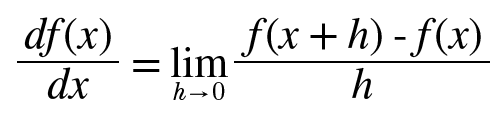

In [25]:
Image("6.png")

좌변은 f(x)의 x에 대한 미분 (x에 대한 f(x)의 변화량)   
즉 x의 작은 변화가 f(x)를 얼마나 변화시키느냐

### 수치미분 numerical differentiation

In [26]:
# 나쁜 구현인 이유 
def numerical_diff(f, x):
    h = 10e-50             # 왜 나쁜 구현이냐면 반올림 오차가 일어나기 때문, 반올림 오차는 아주 작은 값인 경우 생략되어버리는 현상이 일어난다
    return(f(x + h) - f(x)) / h  # 진정한 미분은 x위치의 함수의 기울기에 해당하지만 이 함수의 미분값은 (x+h) 와 x 사이의 기울기에 해당한다 
                                 # 는 h를 무한히 0으로 좁히는 게 불가능해 생기는 한계다.

In [27]:
np.float32(1e-50)           

0.0

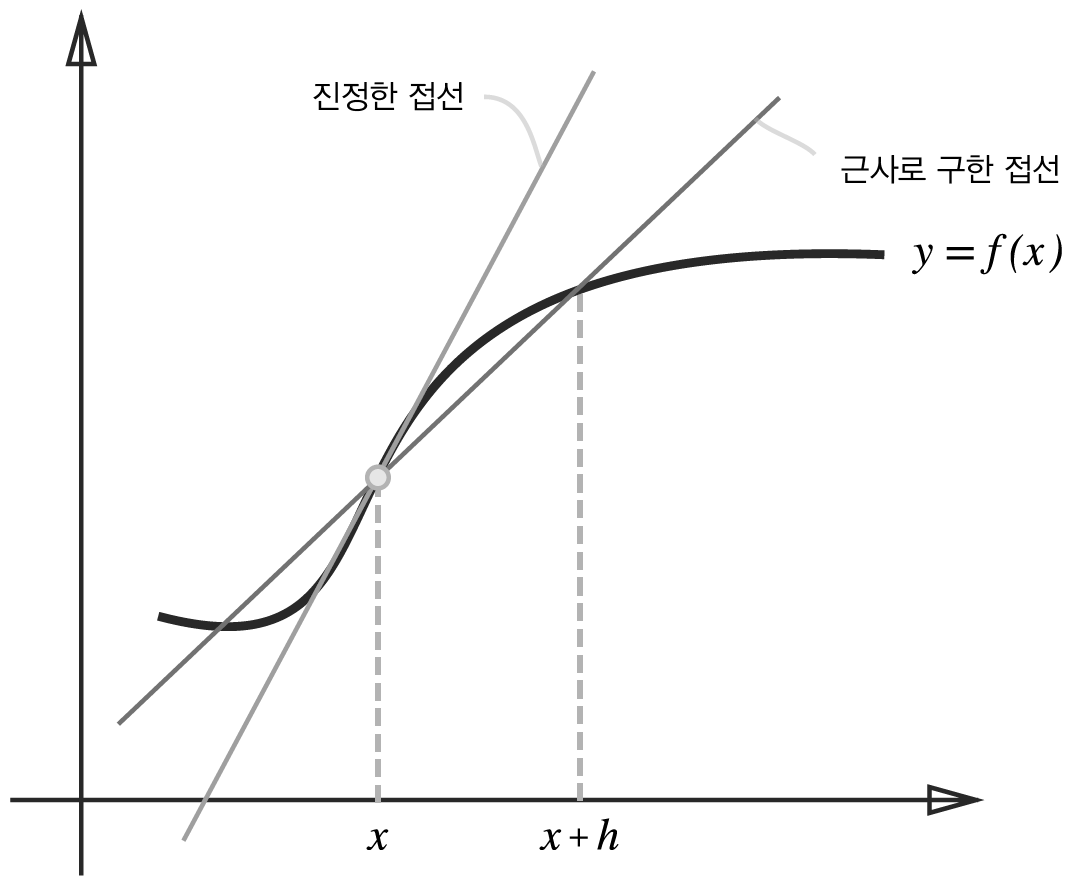

In [28]:
Image("7.png")

In [29]:
# 개선
def numerical_diff(f, x):
    h = 1e-4                             # 0.0001  이 정도면 좋은 결과가 나온다고 알려져 있다
    return (f(x+h) - f(x-h)) / (2*h)     # 위의 전방차분 대신 중심차분, 중앙 차분을 구한다. 

### 수치미분 구현

In [30]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

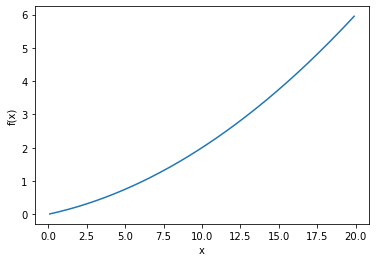

In [31]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.1, 20.0, 0.1)  # 0에서 20까지 0.1 간격의 배열 x를 만든다. 
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [32]:
numerical_diff(function_1, 5)

0.1999999999990898

In [33]:
numerical_diff(function_1, 10)

0.2999999999986347

## 편미분

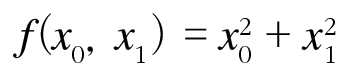

In [34]:
Image("8.png")

In [35]:
def function_2(x):                # 인수 x 는 넘파이 배열이라고 가정
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

위 함수를 그려보면 아래와 같다

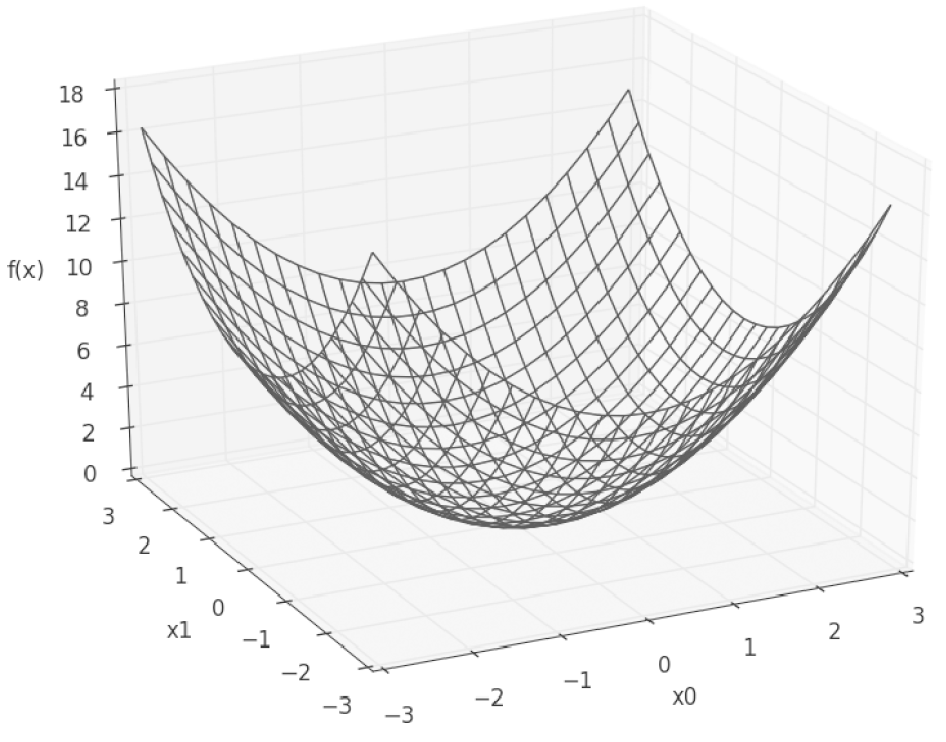

In [36]:
Image("9.png")

편미분 : 변수가 여럿인 함수에대한 미분   
편미분을 나타내는 수학기호는 델(∂), 디 ,파셜 디(partial dee) 라고 한다. 델타(δ)의 변형이다   
https://ko.wikipedia.org/wiki/%E2%88%82

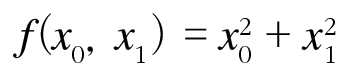

In [37]:
Image("8.png")

위의 함수에서   
   
x0 = 3,  x1 = 4 일때   
   
   
x0에 대한 편미분은?

In [38]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)   

In [39]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0     # 함수 f에서 x1 = 4 로 고정된 새로운 함수를 정의 : x0제곱 + 16
                                # 변수가 x제곱 하나뿐인 함수에 대해 수치미분 함수 적용 

In [40]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [41]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1   # 함수 f에서 x0 = 3 으로 고정된 새로운 함수를 정의 : x1제곱 + 9

In [42]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

결국 편미분도 변수가 하나인 미분과 마찬가지로   
특정 장소의 기울기를 구한다.

# 6. 기울기

### 기울기(gradient) : 모든 변수의 편미분을 벡터로 정리한 것

No handles with labels found to put in legend.


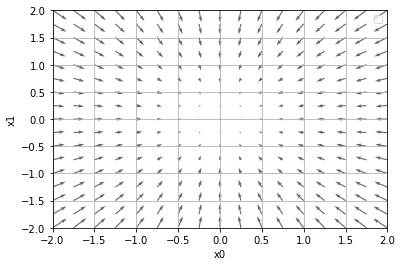

In [43]:
 # coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


# def numerical_diff(f, x):
#     h = 1e-4                            
#     return (f(x+h) - f(x-h)) / (2*h)   

def _numerical_gradient_no_batch(f, x):     # 는 넘파이 배열을 받는다.
    h = 1e-4                                         # 0.0001
    grad = np.zeros_like(x)                          # x와 형상이 같은 배열을 생성, 기울기를 담을 0 행렬 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)          # 넘파이 배열 x의 각 원소에 대해 수치미분을 구한다.
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):                        # X의 각 행에 대해 
            grad[idx] = _numerical_gradient_no_batch(f, x)   # 각 행(넘파이 배열)의 원소들의 기울기를 구한다. 
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)   # axis = 1 이므로 각 행에 대해 각 행의 원소의 제곱의 총합.
                                     # 2차원 배열에서 axis = 0 은 열방향, axis =1 행방향


def tangent_line(f, x):               # 접선 
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':             # 인터프리터에서 직접 실행했을 경우에만 if문 내의 코드를 돌리라는 명령이 됩니다.
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    
    # 기울기에 왜 마이너스를 붙인거지??????????????????????????????????
    
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

In [44]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [45]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [46]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

# 7. 경사 하강법

In [47]:
# 매개변수(가중치)의 공간이 광대하여(=가중치가 너무 많아서) 어디가 손실함수가 최소값이 될 때의 매개변수 값을 찾으려면 탐색이 필요하다

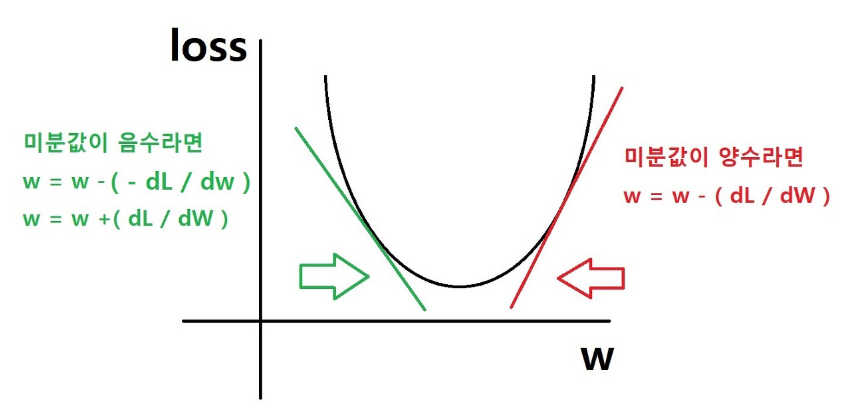

In [48]:
Image("12.png")

**y** = h ( Wx + b )

**L** = −Σlog(**y**)

W' = W - a * (d**L** / dW )

W가 아주 조금 변했을 때 L이 얼마나 변하는가,     
이 변화량이 양수라는 건 W가 양의 방향으로 증가할 때 L도 양의 방향으로 증가한다는 걸 의미,   
   
    
바꿔 말하면 W가 좀 더 줄어들어야 한다는 뜻   
   
반대로 변화량이 음수라는 건 W가 음의 방향으로 줄어들 때 L은 양의 방향으로 증가하고   
W가 양의 방향으로 증가할 때 L은 음의 방향으로 줄어든다는 걸 의미   
   
따라서 W를 좀 더 크게 하면 L이 줄어들 것이다.    
   
   
그래서 기존 W에 미분값이 양이면 빼주고   
미분값이 음이면 더해주기 위해   
위와 같이 식을 만든 것

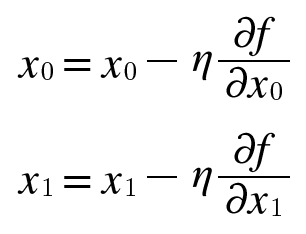

In [49]:
Image("10.png")

위 식에선 가중치 매개변수가 2개인 경우, 변수가 늘어도 같은 식으로(각 가중치의 손실함수에 대한 편미분 값으로) 갱신된다

In [50]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):  # f는 최적화하려는 함수, init_x는 초기 가중치값, step_num은 반복횟수
    x = init_x
    x_history = []

    for i in range(step_num):               
        x_history.append(x)  # x를 깊은 복사하지 않고 그냥 append하면  왜 아래처럼 나올까? 
                                        # 맨 처음에 -3.0, 4.0이  x_history에 들어가고  (x가 init_x를 가리키니까) 얕은 복사된다. 
        grad = numerical_gradient(f, x)         
        x -= lr * grad                    # 계산결과 -2.4,  3.2 이게 나오는 데 x가 이 계산결과를 다시 가리키게 된다. 
                                                 # 그러면 x_history 에 있던 x, -3.0, 4.0 이  -2.4,  3.2 로 바뀌는 것.         
    return x, np.array(x_history)                # 이제 두번째 for문을 돌면   -2.4,  3.2 가 x_history에 append되고                
                                                 # x_history에는 -2.4,  3.2 가 2개 있게 되는 것.

def function_2(x):                     # 최적화하려는 함수
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0, 4.0])        # 초기 가중치 값

lr = 0.1
step_num = 1
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
x_history

array([[-2.4,  3.2]])

In [51]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):  # f는 최적화하려는 함수, init_x는 초기 가중치값, step_num은 반복횟수
    x = init_x
    x_history = []

    for i in range(step_num):               
        x_history.append(x.copy)  # 넘파이의 .copy() 메서드는 깊은 복사다. 전혀 다른 메모리 공간에 복사해 별개의 객체를 만듦.
                                              # init_x 를 가리키는 x가 append 되는 게 아니라 별도의 메모리 공간을 할당받은 x가 
                                                 #-3.0, 4.0 값을 가리키고 이 x가 x_history에 append
        grad = numerical_gradient(f, x)  # 이제 여기서 계산되는 x는 x_init을 가리키는 x가 계산된다. 
        x -= lr * grad               # init_x를 가리키는 x가 새로 계산된 값을 가리키게 되지만 위에서 깊은 복사를 했으므로             
                                                # x_history안에 있는 x값 -3.0, 4.0 는 바뀌지 않고 그대로 남아 있게 된다.               
    return x, np.array(x_history)                                 


def function_2(x):                     # 최적화하려는 함수
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0, 4.0])        # 초기 가중치 값

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

In [52]:
#  = 대입연산자로 바인딩 하는 경우 
# mutable에서 얕은 복사는 같은 메모리 주소를 바라보게 한다. 복사본(원본)이 바뀌면 원본(복사본)도 바뀐다 

a = [1, 2, 3]
b = a # shallow copy
b[0]= 5
a

# a = [1, 2, 3]
# b = a # shallow copy
# a[0]= 5
# b

[5, 2, 3]

In [53]:
# immutable 객체를 얕은 복사하면 처음엔 mutable처럼 같은 메모리 주소를 보지만
# 복사본(원본)이 바뀌면 원본(복사본)은 안 변하고 복사본(원본)에 새로운 메모리주소가 할당된다

a = "abc"
b = a

b.replace("a", "A")
a

# a = "abc"
# b = a

# a.replace("a", "A")
# b

'abc'

In [54]:
# 리스트 슬라이싱은 새로운 메모리 주소를 할당하지만 mutable안에 mutable이 있는 복합객체일 경우
# 안에 있는 원소들은 같은 메모리 주소를 바라본다. 그래서 복사본의 원소 값을 바꾸면 원본도 따라 바뀐다 

a = [[1,2], [3,4]]
b = a[:]

a[1].append(5)
b

# b[1].append(5)
# a

[[1, 2], [3, 4, 5]]

In [55]:
import copy           # 얕은 복사 
a = [[1,2],[3,4]]
b = copy.copy(a)
a[1].append(5)
b

[[1, 2], [3, 4, 5]]

In [56]:
import copy 
a = [[1,2],[3,4]] 
b = copy.deepcopy(a)    # 깊은 복사 
a[1].append(5)
b

[[1, 2], [3, 4]]

In [57]:
x_history

array([<built-in method copy of numpy.ndarray object at 0x7f99912ae2d0>,
       <built-in method copy of numpy.ndarray object at 0x7f99912ae2d0>,
       <built-in method copy of numpy.ndarray object at 0x7f99912ae2d0>,
       <built-in method copy of numpy.ndarray object at 0x7f99912ae2d0>,
       <built-in method copy of numpy.ndarray object at 0x7f99912ae2d0>,
       <built-in method copy of numpy.ndarray object at 0x7f99912ae2d0>,
       <built-in method copy of numpy.ndarray object at 0x7f99912ae2d0>,
       <built-in method copy of numpy.ndarray object at 0x7f99912ae2d0>,
       <built-in method copy of numpy.ndarray object at 0x7f99912ae2d0>,
       <built-in method copy of numpy.ndarray object at 0x7f99912ae2d0>,
       <built-in method copy of numpy.ndarray object at 0x7f99912ae2d0>,
       <built-in method copy of numpy.ndarray object at 0x7f99912ae2d0>,
       <built-in method copy of numpy.ndarray object at 0x7f99912ae2d0>,
       <built-in method copy of numpy.ndarray objec

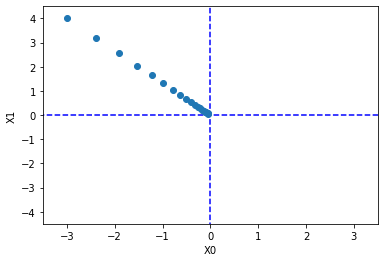

In [58]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):  # f는 최적화하려는 함수, init_x는 초기 가중치값, step_num은 반복횟수
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):                     # 최적화하려는 함수
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])        # 초기 가중치 값

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [59]:
# 학습률이 너무 큰 예 : lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2,init_x=init_x, lr=10.0, step_num=100)   # 발산해버린다 

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [60]:
# 학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2,init_x=init_x, lr=1e-10, step_num=100)  # 갱신되지 않는다 

(array([-2.99999994,  3.99999992]),
 array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.999

# 8. 신경망에서의 기울기

신경망 학습에서 기울기는 가중치 매개변수에 대한 손실함수의 미분값들   
   
      
      (엄말히 말하면 수학에서의 기울기와 딥러닝에서의 기울기의 의미는 다르다.   
      수학에서의 기울기는 벡터에 대한 미분으로 한정된다.   
      그러나 딥러닝에서는 행렬이나 텐서에 대해서도 미분을 정의하고 그것을 기울기라 부르는 것이 일반적이다)
   
예를 들어 2 x 3 가중치행렬 W   
손실함수 L인 신경망의 경사는 다음과 같이 수식으로 나타낼 수 있다

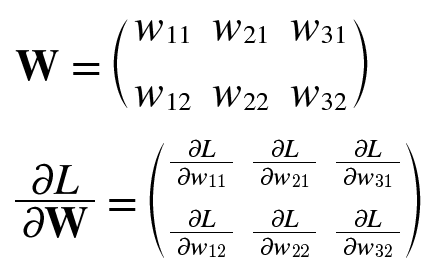

In [61]:
Image("11.png")

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)                   # common/functions.py에 정의한 소프트맥스와
        loss = cross_entropy_error(y, t)  # 크로스 엔트로피 에러 메서드를 사용 

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()
print("초기 가중치 행렬 :", net.W)
p = net.predict(x) 
print("순전파 : ", p)

print("최대값의 인덱스 : ", np.argmax(p))

f = lambda w: net.loss(x, t)              # 로스
dW = numerical_gradient(f, net.W)

print(dW)

초기 가중치 행렬 : [[-1.03550221  0.01954217  0.43437836]
 [-0.8381533  -0.83964187  1.88787753]]
순전파 :  [-1.37563929 -0.74395238  1.9597168 ]
최대값의 인덱스 :  2
[[ 0.01937411  0.03643845 -0.05581256]
 [ 0.02906116  0.05465767 -0.08371883]]


In [2]:
net = simpleNet()
print(net.W)  # 가중치 매개변수

[[ 1.01532591  1.76661385  1.25124266]
 [ 0.4368951  -0.48523213  0.60598103]]


In [3]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[1.00240113 0.62325939 1.29612852]


In [4]:
np.argmax(p)  # 최댓값의 인덱스

2

In [5]:
t = np.array([0, 0, 1])   # 정답 레이블
net.loss(x, t)

0.8134699701868803

In [9]:
def f(W):
    return net.loss(x, t)                # 일부러 더미 함수를 만든것
dW = numerical_gradient(f, net.W)        # 미분 구하는 함수의 인자로 넣어주려고 
print(dW)

[[ 0.19829821  0.13571679 -0.334015  ]
 [ 0.29744732  0.20357518 -0.5010225 ]]


In [12]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.19831414  0.13571141 -0.33402555]
 [ 0.29747122  0.20356711 -0.50103832]]


dW 내용을 보면 1,1 위치에 있는 기울기는 0.2다. 이는 그 가중치를 h만큼 늘리면 L값이 0.2h만큼 중가한다는 의미다. 따라서 음의 방향으로 갱신해야 한다   
반면 2,3 위치에 있는 기울기는 약 -0.5이므로 양의 방향으로 갱신해야 할 것이다.   
또 한 번에 갱신되는 양은 W(1,1)보다 W(2,3)이 더 크게 기여한다는 사실도 알 수 있다.

# 확률적 경사하강법 stochastic gradient descent (SGD) 

확률적으로 무작위로 골라낸 데이터에 대해 수행하는 경사하강법

# MNIST 데이터 셋 사용 손글씨 숫자를 학습하는 신경망 구현 실습

# 9. 2층 신경망 클래스 구현하기 (모델 설계)

In [93]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # input_size : 입력 데이터의 차원수 (입력층의 뉴런수) 
        # hidden_size : 은닉층을 거친 데이터의 차원수  (은닉층의 뉴런수)
        # output_size : 클래스 개수 
        
        # 가중치 초기화 
        # np.random.randn 가우시안 표준 정규 분포에서 난수 배열 생성 + 가중치를 작은 무작위 값으로 설정하면 학습이 잘 될 가능성 커져서 0.01 곱함
        
        # 편향 초기화 : 0으로 초기화 
        
        self.params = {}  # params : 가중치와 편향 같은 매개변수를 담는 딕셔너리
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)  
        self.params['b1'] = np.zeros(hidden_size)                                       
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x): # 순전파 
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t): 
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
               # batch_size = y.shape[0]
               # return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
                  # 배치사이즈개수 만큼 배치 순서대로 넘파이 배열을 만들어 y에 순서대로 인덱싱을 해주는데, y배열의 원소 중 정답 레이블에 해당하는 원소만 뽑아서 
                  # 음의 로그를 씌운 다음 다 더해 준후 배치사이즈 개수로 나눈다.

    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)      # 2차원 배열에서 axis = 0 은 열방향, axis =1 행방향
        t = np.argmax(t, axis=1)      # # np.argmax()  배열의 원소 중 최대값의 인덱스를 반환한다. 
        
        accuracy = np.sum(y == t) / float(x.shape[0])  # 예측값이 최대인 인덱스와 원핫 인코딩된 레이블의 인덱스가 같은 샘플들만 더해서 배치사이즈로 나눠준다.
        return accuracy
        

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}  # params에 저장된 각 매개변수에 대응하여, 해당 매개변수의 기울기를 보관하는 딕셔너리
        grads['W1'] = numerical_gradient(loss_W, self.params['W1']) # 이게 재귀함수가 안걸리고 임포트가 먹히는 이유가 뭐지? 함수이름이 같은데?    
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    
#         def numerical_gradient(f, x):  편미분 코드 
#             h = 1e-4 # 0.0001
#             grad = np.zeros_like(x)

#             it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
#             while not it.finished:
#                 idx = it.multi_index
#                 tmp_val = x[idx]
#                 x[idx] = float(tmp_val) + h
#                 fxh1 = f(x) # f(x+h)

#                 x[idx] = tmp_val - h 
#                 fxh2 = f(x) # f(x-h)
#                 grad[idx] = (fxh1 - fxh2) / (2*h)

#                 x[idx] = tmp_val # 값 복원
#                 it.iternext()   

#             return grad
        
        
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]  # 100
        
        # forward
        a1 = np.dot(x, W1) + b1   # 입력값 x,  가중치 W1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2  # 입력값 z1, 가중치 W2 
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num            # 최종 로스에 대한 소프트맥스 출력값의 미분 : y - t 
                                            # 역전파시 전파하는 값을 배치의 수로 나눠서 데이터 1개당 오차를 앞계층으로 전파한다
            
        grads['W2'] = np.dot(z1.T, dy)      # dy에 대한 W2의 미분  : z1.T * dy = (50,100) * (100,10) = (50,10)
        grads['b2'] = np.sum(dy, axis=0)    # dy에 대한 b2의 미분   : (10,)
                                            # 순전파시 편향 벡터를 배치사이즈 만큼 열방향으로 복제해서 더해줬으니까
                                            # 역전파시에는 그 배치사이즈 수만큼의 기울기들을 열방향으로 더해서 하나의 벡터로 만듦
                                            # (2차원 배열에서 axis = 0 은 열방향, axis =1 행방향)
        
        da1 = np.dot(dy, W2.T)              # dy에 대한 a1의 미분  : dy * W2.T = (100, 10) * (10, 50)  = (100, 50)
        dz1 = sigmoid_grad(a1) * da1        # a1에 대한 z1의 미분  : (100, 50) * (100, 50) element-wise 곱  = (100, 50)
                                            # upstream gradient da1 * local gradient (1.0 - sigmoid(x)) * sigmoid(x)
            
        grads['W1'] = np.dot(x.T, dz1)      # z1에 대한 W1의 미분 :  x.T * dz1 = (784,100) * (100, 50) = (784,50)
        grads['b1'] = np.sum(dz1, axis=0)   # z1에 대한 b1의 미분  : (50,)

        return grads
    
    # 신경망의 한 레이어에서 입출력값이 행렬(텐서)인 경우 >>> ex) 배치처리를 했을 경우
    # 입력 행렬 X의 각 원소(Xij)에 대해 출력행렬 (Y)의 모든 원소를 미분해야한다. >>> 이를 자코비언 행렬을 구한다고 한다. 
    # (우리가 구하고자하는 local gradient는 X에 대한 Z의 미분이므로)
    
# 예시를 통해 살펴보면 ,

#      x        곱하기      w        는         y             라고 하자.
# [2    1  -3]       [3  2  1  -1]       [-1  -1  2  6]
# [-3   4   2]       [2  1   3   2]      [ 5   2  11  7]
#                    [3  2   1  -2]

#  우리가 구하고자 하는 건 upstream gradient인 dL/dy가 주어졌을 때 아래와 같은 자코비언 행렬이다. 

#    dL/dx                dy/dx               dL/dy   (y의 각 원소가 L(scalar)에 미치는 영향)
# 자코비언행렬         자코비언 행렬         [2   3   -3   9]   
#                                          [-8  1    4   6]

# 아래 예시 그림 참고 

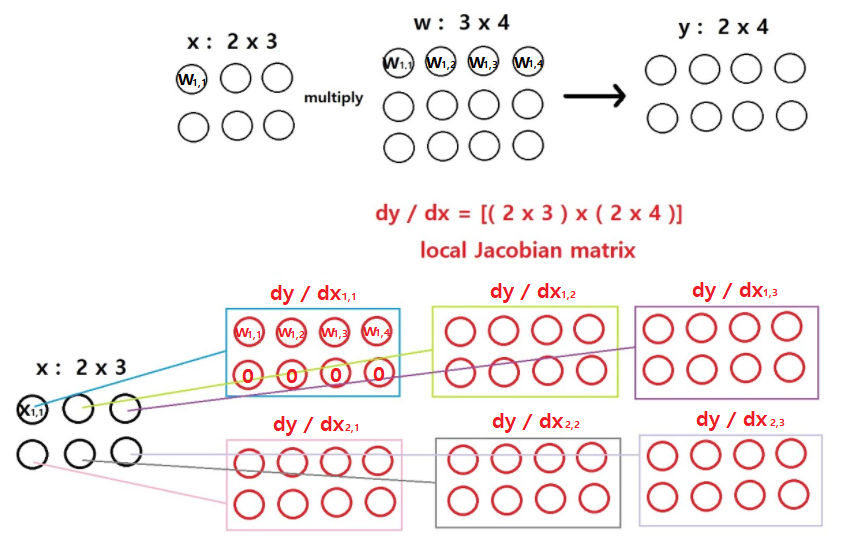

In [3]:
Image("14.png", width = 1000, height = 800)

In [ ]:
    #  위 예시에서 X의 (1,1) 위치에 있는 원소 (2)는 가중치행렬의 첫번째 행에 있는 원소들 (3, 2, 1, -1)에만 곱해진다.
    # 따라서 dy/dx1,1 행렬은 (편미분을 해보면) 첫번째 행렬이 가중치 행렬 w의 첫번째 행과 같고 나머지 원소는 모두 0인 행렬과 같다.
#          [3, 2, 1, -1]
#          [0, 0, 0, 0]

    # 우리가 구하고자 하는 dL/dx1,1 은 dy/dx1,1 과 dL/dy 를 내적한 것이므로 
    # (왜냐하면 체인룰에 따라 downstream gradient = local gradient * upstream gradient)
#    dy/dx1,1               dL/dy             
# [3, 2, 1, -1]       [2   3   -3   9]   이 두 행렬을 내적하면(element-wise 곱 한다음 그 모든 결과를 합계하면) 0이 된다.
# [0, 0, 0,  0]       [-8  1    4   6]   즉 dL/dx1,1 은 0이다. 
#                                              
    
    # 이런 식으로 모든 X의 원소에 대해 Y행렬의 모든 원소를 미분한 결과는
    # 결과적으로 dL/dy 에 가중치행렬을 전치한 행렬을 행렬곱한 것과 같아진다.
#                               w의 전치행렬   
#          dL/dy              [3,   2,   3]          dL/dx
#     [2   3   -3   9]        [2,   1,   2]      [0,    16,  -9]
#     [-8  1    4   6]        [1,    3,  1]      [-24,  9,  -30] 
#                             [-1,   2, -2]
    # 일반화하면 
    # dL/dx = upstream gradient dL/dy 곱하기 w의 전치행렬   >>> da1 = np.dot(dy, W2.T)    
    # dL/dw = x의 전치행렬 곱하기 upstream gradient dL/dy   >>> grads['W1'] = np.dot(x.T, dz1) / grads['W2'] = np.dot(z1.T, dy)
    
# 위 두 연산은 단순한 upstream gradient와 local gradient를 곱하기 위한 행렬곱 연산이 아니라
# 매우 큰 고차원의 sparse 자코비언 행렬과 upstream gradient 행렬간의, 다시 말해 
# "Implicit" matrix vector multiplication 으로서의 upstream gradient와 local gradient의 곱셉으로 이해해야 한다. 

In [89]:
import time 
net = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
x = np.random.rand(1, 784) 
t = np.random.rand(1, 10)  

In [90]:
start=time.time() 
grads = net.numerical_gradient(x, t)   # 기울기 계산 : 수치미분은 단순하고 구현이 쉽지만 계산이 엄청 오래 걸린다.
print('수치미분 시간 :',round(time.time()-start,4)) 

수치미분 시간 : 19.2235


In [92]:
start=time.time() 
grads = net.gradient(x, t)   # 기울기 계산 : 수치미분은 단순하고 구현이 쉽지만 계산이 엄청 오래 걸린다.
print('오차역전파법 시간 :',round(time.time()-start,4)) 

오차역전파법 시간 : 0.002


샘플 하나만 계산하는데 수치미분이 9500백배 느림  

In [ ]:
입력값

# 10. MNIST 데이터 셋으로 학습해보기 (학습 코드 구현)

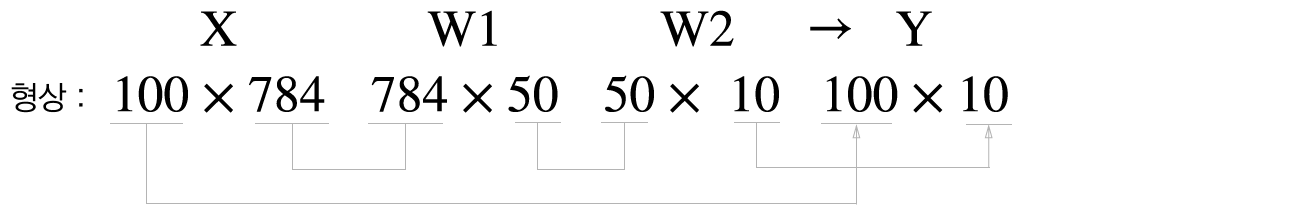

In [79]:
Image("13.png")

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.7892666666666667, 0.7948
train acc, test acc | 0.87865, 0.8826
train acc, test acc | 0.8993666666666666, 0.904
train acc, test acc | 0.9099666666666667, 0.9126
train acc, test acc | 0.9150333333333334, 0.9168
train acc, test acc | 0.9205833333333333, 0.9222
train acc, test acc | 0.9250333333333334, 0.9257
train acc, test acc | 0.9280833333333334, 0.9303
train acc, test acc | 0.9318833333333333, 0.9321
train acc, test acc | 0.93435, 0.9369
train acc, test acc | 0.9372333333333334, 0.9376
train acc, test acc | 0.9393666666666667, 0.939
train acc, test acc | 0.9420166666666666, 0.9406
train acc, test acc | 0.94335, 0.9429
train acc, test acc | 0.9456333333333333, 0.9437
train acc, test acc | 0.9478, 0.9455


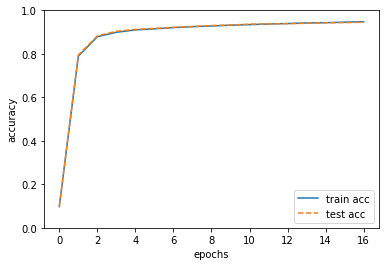

In [49]:
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000                     # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]         # 60000
batch_size = 100                      # 미니배치 크기
learning_rate = 0.1

train_loss_list = []    # 매 iter 마다 계산된 최종 loss가 append 되는 리스트 
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)              # 600

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)      # 60000개 중에 무작위로 100개를 뽑는다. 
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
#    grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)                  # 레이어의 출력값에 대한 W2, W1, b2, b1 의 기울기 
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'): 
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)                     # 매 iter마다 최종 loss 기록 
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:                                   # iter_per_epoch = 600 
        train_acc = network.accuracy(x_train, t_train)            # 첫 iter train / test acc 부터 10000 / 600 = 16.6  
        test_acc = network.accuracy(x_test, t_test)               # 총 16에폭에서의 train / test acc 기록. 그래프 그리는 데 사용
        train_acc_list.append(train_acc)                            # 6만개를 1백개의 미니배치로 학습할 경우
        test_acc_list.append(test_acc)                              # SGD를 600번 반복하면 모든 훈련데이터를 소진한 게 되므로 600회가 1에폭
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


##  1 iter example

In [76]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
train_size = x_train.shape[0]        
batch_size = 100                     
learning_rate = 0.1

In [77]:
train_loss_list = []    
train_acc_list = []
test_acc_list = []

In [78]:
batch_mask = np.random.choice(train_size, batch_size)    
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [79]:
x_batch.shape

(100, 784)

In [82]:
W1, W2 = network.params['W1'], network.params['W2']
b1, b2 = network.params['b1'], network.params['b2']


batch_num = x.shape[0]  # 100

# forward
a1 = np.dot(x_batch, W1) + b1   # 입력값 x,  가중치 W1
print("a1.shape: ", a1.shape)
z1 = sigmoid(a1)
print("z1.shape: ", z1.shape)
a2 = np.dot(z1, W2) + b2  # 입력값 z1, 가중치 W2
print("a2.shape: ", a2.shape)
y = softmax(a2)
print("y.shape: ", y.shape)

# backward
dy = (y - t_batch) / batch_num    
print("dy.shape: ", dy.shape)

a1.shape:  (100, 50)
z1.shape:  (100, 50)
a2.shape:  (100, 10)
y.shape:  (100, 10)
dy.shape:  (100, 10)


In [68]:
grad = network.gradient(x_batch, t_batch)            
grad.keys()

dict_keys(['W2', 'b2', 'W1', 'b1'])

In [69]:
grad['W2'][0]

array([ 0.012575  , -0.01721756, -0.01143673, -0.03639304, -0.00964698,
        0.01871864,  0.00479912,  0.01039444,  0.01551787,  0.01268925])

In [70]:
print(grad['W1'].shape, grad['b1'].shape, grad['W2'].shape, grad['b2'].shape)

(784, 50) (50,) (50, 10) (10,)


In [71]:
print(network.params['W1'].shape, network.params['b1'].shape, network.params['W2'].shape, network.params['b2'].shape)

(784, 50) (50,) (50, 10) (10,)


In [72]:
network.params['W2'][0]

array([ 0.00019873, -0.01363716, -0.01033943,  0.01121972,  0.01342449,
        0.01209499, -0.00732606,  0.00503937, -0.01888392,  0.00739384])

In [73]:
for key in ('W1', 'b1', 'W2', 'b2'): 
    network.params[key] -= learning_rate * grad[key]

In [74]:
network.params['W2'][0]

array([-0.00105877, -0.0119154 , -0.00919576,  0.01485902,  0.01438919,
        0.01022313, -0.00780597,  0.00399992, -0.0204357 ,  0.00612491])

# 오버피팅 대응     
### 1. early stopping : 오버피팅이 일어나는 순간을 포착해 학습 중단   
### 2. regularization : weight decay, dropout, batch_norm(layer_norm)    
### 3. 데이터를 더 모아서 돌린다   
### 4. 모델 사이즈를 줄여본다
   
   


